# Mushroom Classification
In this notebook, I will make use of the Mushroom Classification dataset to try to predict if a Mushroom is poisonous or not by looking at the given features. I will successivelly try differerent feature elimination techniques to see how this can affect training times and overall model accuracy.

Reducing the number of features in a dataset, can lead to:
- Accuracy improvements
- Overfitting risk reduction
- Speed up in training
- Improved Data Visualization

## Data Preprocessing

In [4]:
# 前两行画图
%matplotlib inline
import matplotlib.pyplot as plt

# 数据处理
import numpy as np
import pandas as pd

# 系统库
import os, sys

# 自带数据
datalib_path = os.path.join(os.path.abspath('.'), '../')
sys.path.append(datalib_path)
import dataset

# seaborn 画图库
import seaborn as sns

In [22]:
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

In [2]:
# 读取数据
df = pd.read_csv(os.path.join(dataset.mushrooms_path, 'mushrooms.csv'))
pd.options.display.max_columns = None
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
class,0.0
stalk-surface-above-ring,0.0
population,0.0
spore-print-color,0.0
ring-type,0.0
ring-number,0.0
veil-color,0.0
veil-type,0.0
stalk-color-below-ring,0.0
stalk-color-above-ring,0.0


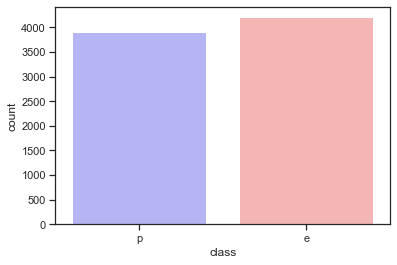

In [6]:
sns.set(style="ticks")
f = sns.countplot(x="class", data=df, palette="bwr")
plt.show()

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
df.shape

(8124, 23)

We can now divide our dataset in features (X) and labels (Y). We then transoform all our dataset categorical features in numeric features using One Hot Encoding. <br> <br>
A new column gets created for all the diffent cases in a categorical feature. <br> <br>
For example, the **bruises** feature contains two categorical cases **f** and **t**. This categorical feature will be splitted in two numeric features, one having 1s in all the rows for which the mushroom which had bruises f (**bruises_f**) and the second one having 1s for all the  rows for which the mushroom had bruises t (**bruises_t**). <br> <br>
In the case of our labels (Y), we instead encode them. In our example, we have two different possible outcomes (edible or not). Therefore, we set the color of the first outcome equal to 0 and the second possible outcome equal to 1. And all the informations for this class will be contained in a single array (column). <br> <br>

I decided not to adopt this same approch for the features (X), because some Machine Learning classifier might think that higher numbers are more important than lower ones and therefore would not give the same importance to the all the different categories in the feature (this doesn't instead happen when we encode the labels).

In [9]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [10]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [11]:
len(X.columns)

117

In [23]:
Y = LabelEncoder().fit_transform(Y)
#np.set_printoptions(threshold=np.inf)
Y

array([1, 0, 0, ..., 0, 1, 0])

## Machine Learning

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X2 = StandardScaler().fit_transform(X)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30, random_state = 101)

In [25]:
start = time.process_time()
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
print(time.process_time() - start)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

0.1725089999999998
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



/Users/guchen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
start = time.process_time()
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

0.2655290000000008
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



/Users/guchen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

0.03340799999999966
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



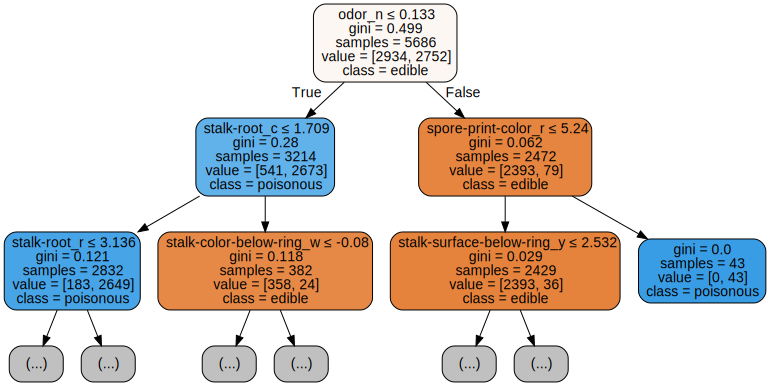

In [28]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(trainedtree,out_file=None,feature_names= X.columns,
                       class_names=['edible', 'poisonous'],  
                       filled=True, rounded=True,  
                       max_depth=2,
                       special_characters=True)
graph = graphviz.Source(data)
graph

### Feature Selection

There are many different methods which can be applied for Feature Selection. Some of the most important ones are: <br>
1. Filter Method = filtering our dataset and taking only a subset of it containg all the relevant features (eg. correlation matrix using Pearson Correlation)
2. Wrapper Method = follows the same objective of the FIlter Method but uses a Machine Learning model as it's evaluation criteria (eg. Forward/Backward/Bidirectional/Recursive Feature Elimination). We feed some features to our Machine Learning model, evaluate their performance and then decide if add or remove feature to increase accuracy. As a result, this mothod can be more accurate than filtering, is more computationally expensive.
3. Embedded Method = like the FIlter Method also the Embedded Method makes use of a Machine Learning model. The difference between the two different methods is that the Embedded Method examines the different training iterations of our ML model and then ranks the importance of each feature based on how much each of the features contributed to the ML model training (eg. LASSO Regularization).

#### Feature Importance

Decision Trees models which are based on ensembles (eg. Extra Trees and Random Forest) can be used to rank the importaqnce of the different features. Knowing which features our model is giving most importance can be of vital importance to understand how our model is making it's predictions (therefore making it more explainable). At the same time, we can get rid of the features which do not bring any benefit to our model (our confuse it to make a wrong decision!).

In [29]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

2.471509000000001
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



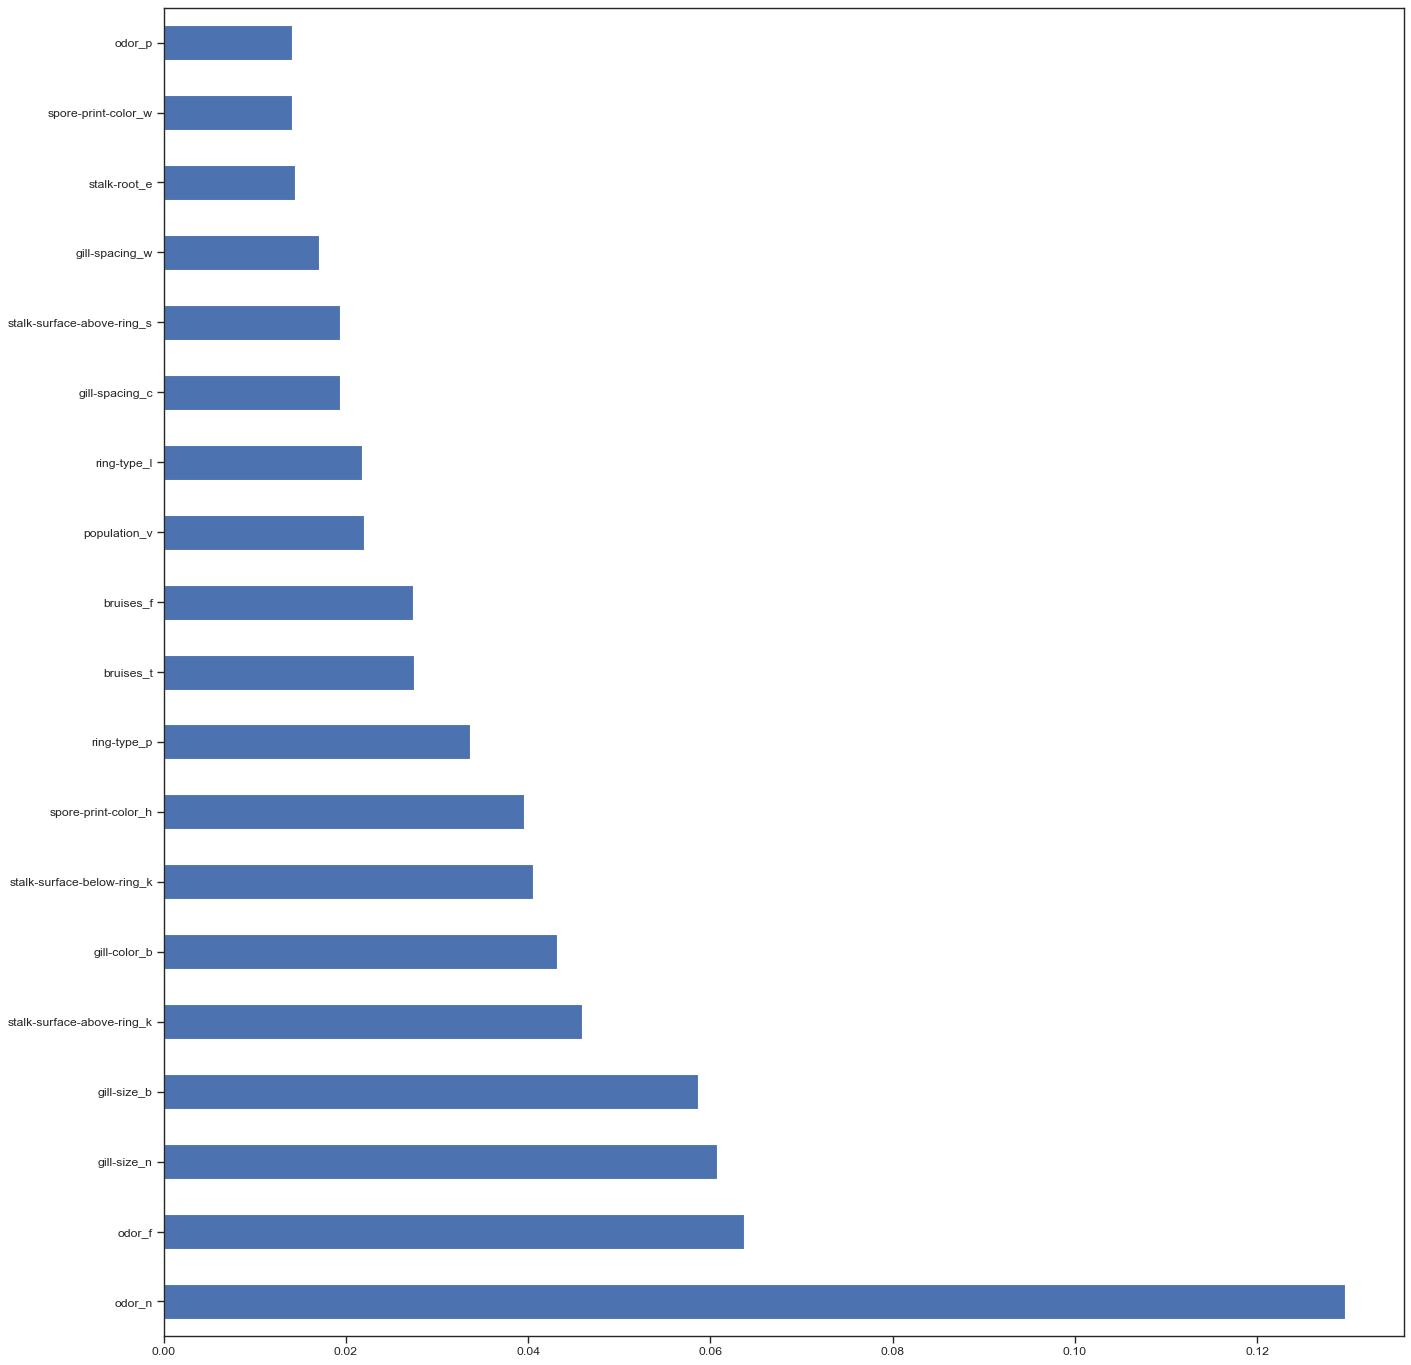

In [30]:
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(19).plot(kind='barh')

In [31]:
X_Reduced = X[['odor_n','odor_f', 'gill-size_n','gill-size_b']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30, random_state = 101)

In [32]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

1.3102470000000022
[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



#### Recursive Feature Elimination

Recursive Feature Elimination (RFE) takes as input the instance of a Machine Learning model and the final desired number of features to use. It then recursively reduces the number of features to use by ranking them using the Machine Learning model accuracy as metrics. Creating a for loop in which the number of input features is our variable, it could then be possible to found out the optimal number of features our model needs by keeping track of the accuracy registred in each loop iteration. Using RFE support_ method, we can then find out the names of the features which have been evaluated as most important (rfe.support_ return a boolean list in which TRUE represent that a feature is considered as important and FALSE represent that a feature is not considered important).  

In [33]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=100)
rfe = RFE(model, 4)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))

28.500087
Overall Accuracy using RFE:  0.9753896636587367


In [34]:
model = RandomForestClassifier(n_estimators=100)
rfe = RFE(model, 4)
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
model.fit(RFE_X_Train,Y_Train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(X.columns))
colcheck[colcheck == True].index

Number of Features:  4
Selected Features: 


Index(['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k'], dtype='object')

#### SelectFromModel: Meta-transformer for selecting features based on importance weights.

SelectFromModel is another Scikit-learn method which can be used for Feature Selection. This method can be used with all the different types of Scikit-learn models (after fitting) which have a coef_ or feature_importances_ attribute. Compared to RFE, SelectFromModel is a less robust solution. In fact, SelectFromModel just removes less important features based on a calculated threshold (no optimization iteration process involved). <br>

In order to test SelectFromModel efficacy, I decided to use an ExtraTreesClassifier in this example. ExtraTreesClassifier (Extremely Randomized Trees) is tree based ensamble classifier which can yield less variance compared to Random Forest methods (reducing therefore the risk of overfitting). The main difference between Random Forest and Extremely Randomized Trees is that in Extremely Randomized Trees nodes are sampled without replacement.

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_Train,Y_Train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_Train)
Selected_X.shape

0.051919999999995525


/Users/guchen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(5686, 18)

In [36]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, Y_Train)
print(time.process_time() - start)
Selected_X_Test = model.transform(X_Test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1.48377499999998
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Feature ranking:
1. feature 4 (0.235408)
2. feature 3 (0.136618)
3. feature 7 (0.094681)
4. feature 6 (0.090673)
5. feature 10 (0.083036)
6. feature 14 (0.063449)
7. feature 1 (0.045488)
8. feature 11 (0.042355)
9. feature 13 (0.037984)
10. feature 16 (0.030843)
11. feature 15 (0.026515)
12. feature 5 (0.018927)
13. feature 9 (0.017914)
14. feature 12 (0.017899)
15. feature 8 (0.017232)
16. feature 2 (0.015643)
17. feature 17 (0.015269)
18. feature 0 (0.010065)


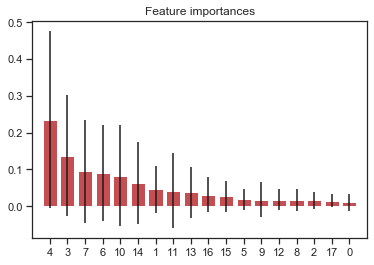

In [37]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = trainedforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in trainedforest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Selected_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Selected_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Selected_X.shape[1]), indices)
plt.xlim([-1, Selected_X.shape[1]])
plt.show()

#### Correlation Matrix Analysis

Using Seaborn, we can now plot the Pearson correlation heatmap of our dataset. Inspecting this plot, we can then be able to see the correlation of our independent variables (X) with our label (Y). Finally, we can then select just the features which are most correlated with Y and train/test an SVM model to test the results of this approach.

Using Pearson correlation our returned coefficient values will vary between -1 and 1:
- If the correlation between two features is 0 this means that changing any of these two features will not affect the other.
- If the correlation between two features is greater than 0 this means that increating the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features). 
- If the correlation between two features is less than 0 this means that increating the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features). 

 Another possible aspect to control in this analysis would be to check if the selected variables are highly correlated each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

In [38]:
Numeric_df = pd.DataFrame(X)
Numeric_df['Y'] = Y
Numeric_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Y
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


bruises_f                     0.501530
bruises_t                     0.501530
gill-color_b                  0.538808
gill-size_b                   0.540024
gill-size_n                   0.540024
ring-type_p                   0.540469
stalk-surface-below-ring_k    0.573524
stalk-surface-above-ring_k    0.587658
odor_f                        0.623842
odor_n                        0.785557
Y                             1.000000
Name: Y, dtype: float64

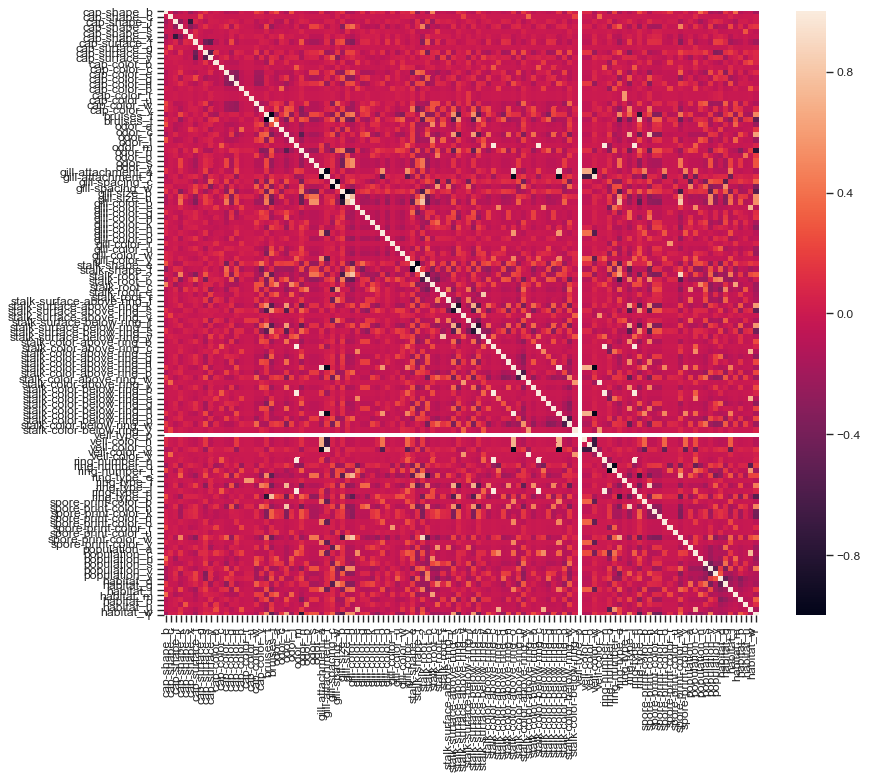

In [39]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr= Numeric_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Selecting only correlated features
corr_y = abs(corr["Y"])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

In [40]:
X_Reduced2 = X[['bruises_f' , 'bruises_t' , 'gill-color_b' , 'gill-size_b' , 'gill-size_n' , 'ring-type_p' , 'stalk-surface-below-ring_k' , 'stalk-surface-above-ring_k' , 
                'odor_f', 'odor_n']]
X_Reduced2 = StandardScaler().fit_transform(X_Reduced2)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_Reduced2, Y, test_size = 0.30, random_state = 101)

In [41]:
start = time.process_time()
trainedsvm = svm.LinearSVC().fit(X_Train3, Y_Train3)
print(time.process_time() - start)
predictionsvm = trainedsvm.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionsvm))
print(classification_report(Y_Test3,predictionsvm))

0.04801500000000658
[[1248   26]
 [  46 1118]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.96      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



#### Univariate Feature Selection

Univariate Feature Selection is a statistical method used to select the features which have the strongest relationship with our corrispondent labels. Using the **SelectKBest** method we can decide which metrics to use to evaluate our features and the number of K best features we want to keep. Different types of scoring functions are available depending on our needs: 
- Classification: chi2, f_classif, mutual_info_classif
- Regression: f_regression, mutual_info_regression

In this example, we will be using chi2. [Chi-squared (Chi2)](https://en.wikipedia.org/wiki/Chi-squared_test) can take as input just non-negative values, therefore, first of all we scale our input data in a range between 0 and 1.

In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X2)

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=2).fit_transform(Scaled_X, Y)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30, random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

1.4762520000000023
[[1015  259]
 [  41 1123]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1274
           1       0.81      0.96      0.88      1164

    accuracy                           0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



#### Lasso Regression

When applying regularization to a Machine Learning model, we add a penalty to the model parameters so that to avoid that our model tries to resemble too closely our input data. In this way, we can make our model less complex and we can avoid overfitting (making learn to our model not just the key data characheteristics but also it's intrinsic noise). <br>

One of the possible Regularization Methods is Lasso (L1) Regrssion. When using Lasso Regression, the coefficients of the inputs features gets shrinken if they are not positively contributing towards our Machine Learning model training. In this way, some of the features might get automatically discarded assigning them coefficients equal to zero.  

In [44]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:-1]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

LassoCV Best Alpha Scored:  0.0003964898084478826
LassoCV Model Accuracy:  0.9971840741918596
Variables Eliminated:  73
Variables Kept:  44


/Users/guchen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37800350585681874, tolerance: 0.1420043615898695
  positive)


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

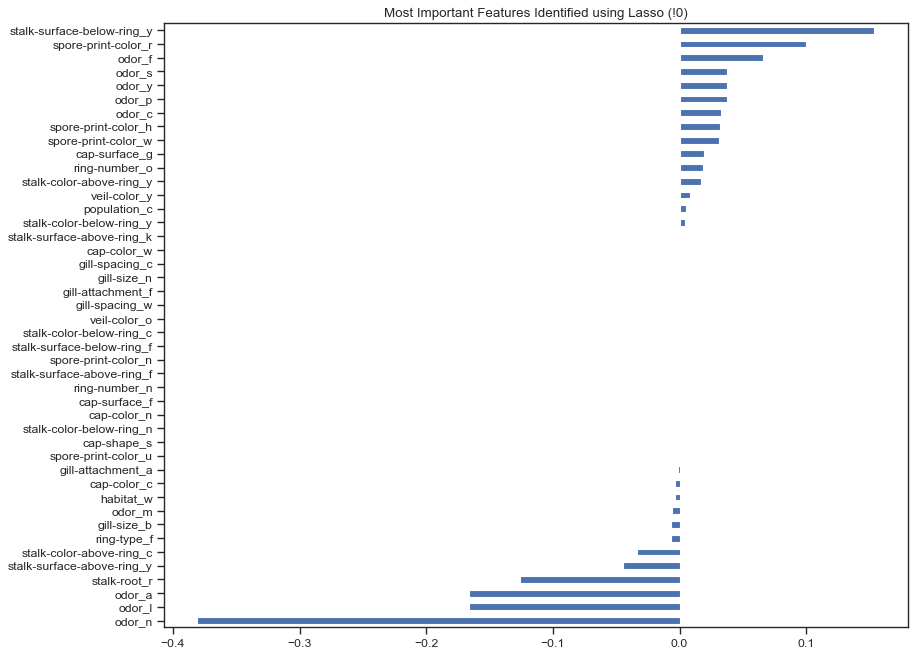

In [45]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")